## Successful training with Mountain Data
* Thus far, I have ran code on my personal jupyter environment (my own computer, and as of 12/14/21 run on MSI). I have failed to successfully run code on Google colabs where I can access GPUs. 

## Conclusions:

I was only able to train my model up to 6 epochs (hard to know for sure how far it got in training, since I believe it only returns and saves models that are better than previous versions, instead of every model after each epoch). Based on my experience training the model, it takes about 4 hours for every epoch (provided I trained with 309 images and tested with 105 while using resnet50). 

For the current models I do have (epoch 1, 2, 4, 5, 6) I have calculated MAP ([mean Average Precision](https://towardsdatascience.com/map-mean-average-precision-might-confuse-you-5956f1bfa9e2)). MAP is a "is a popular evaluation metric used for object detection", the higher the values (can only get as high as 1) the better your model is at avoiding "False Positives" (in this case classifying something as mountain when it isn't mountain). Thus far most of my models' have returned values of 0, but this may be because it failed to even return "True Positives". The one exception is model 6 (saved after 6 epochs) which has a slight decimal value (0.001112) above zero, making me believe this is the best model of all 6). 


In [ ]:

#must install if not already installed in current python environment

# !pip install zipfile #helpfull if you're trying to unzip data
# !pip install imgaug
# !pip install tensorflow 
# !pip install pixellib

#depending on warnings, may need to use tensorflow version 1.5.0, skimage == 0.16.2, and keras==2.1.5

In [7]:
import warnings
warnings.filterwarnings("ignore")
import time
import pixellib
from pixellib.custom_train import instance_custom_training
from pixellib.instance import custom_segmentation
from PIL import Image
from zipfile import ZipFile
import os

import cv2
from matplotlib import pyplot as plt

### Sample Visual

Let's see if I can visualize my dataset! (an image from my mountain dataset)

In [4]:
# import zipfile
# with zipfile.ZipFile("Sub_Mountain.zip", 'r') as zip_ref:
#     zip_ref.extractall()

In [16]:
#change these paths as needed
Path_to_Mountain_data = "Sub_Mountain_USEME"
Path_to_Model = "Models/mask_rcnn_coco.h5"

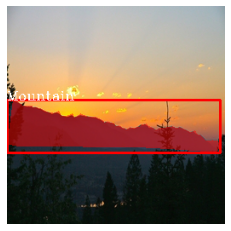

In [9]:
vis_img = instance_custom_training()
vis_img.load_dataset(Path_to_Mountian_data )#change directory as needed
vis_img.visualize_sample()

In [ ]:
#only rerun if trying to train model again...this takes FOREVER!!

### Train a custom model using your dataset
##This method adapts the coco model

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet50", num_classes= 1, batch_size = 6)
train_maskrcnn.load_pretrained_model(Path_to_Model)
train_maskrcnn.load_dataset(Path_to_Mountian_data)
print('starting model training for mountain object')
start = time.process_time()#been trying to time how long it actually takes to train
train_maskrcnn.train_model(num_epochs = 10, augmentation=True,  path_trained_models = "mask_rcnn_models_resnet50") #this alone will take ~40 based on my approximate observations for current runtimes (could be even longer)
print(time.process_time() - start)
      
print("DONE!")

Using resnet50 as network backbone For Mask R-CNN model
starting model training for mountain object
Applying Default Augmentation on Dataset
Train 309 images
Validate 105 images
Checkpoint Path: C:\Users\runac\Downloads\Fall_2021\Advanced Geocomp\MountainProject\mask_rcnn_models_resnet50
Selecting layers to train
Epoch 1/10
 83/100 [=======================>......] - ETA: 45:09 - batch: 41.0000 - size: 6.0000 - loss: 2.5556 - rpn_class_loss: 0.1049 - rpn_bbox_loss: 0.9853 - mrcnn_class_loss: 0.0711 - mrcnn_bbox_loss: 0.7291 - mrcnn_mask_loss: 0.6653

### Model Evaluation

Thus far, I have successfully trained up to 6 epochs (which took just over 24hours) and have the resulting models after each epoch (exempting the model after epoch 3 which did not save to disk. I believe this is a result of code built into pixelLib to save only those models that pass some sort of internal threshold of improvement, or my cat could have accidentally deleted it when he walked across my laptop). 

In the following cells I compute the MAP ([mean Average Precision](https://towardsdatascience.com/map-mean-average-precision-might-confuse-you-5956f1bfa9e2)) for each model, as an assessment measure of its ability to correctly identify objects within an image. 


In [17]:
def MAP(num_classes, resnet, Data, Path_to_resulting_model):
    train_maskrcnn = instance_custom_training()
    train_maskrcnn.modelConfig(network_backbone = resnet, num_classes= num_classes)
    train_maskrcnn.load_dataset(Data)
    return train_maskrcnn.evaluate_model(Path_to_resulting_model) #line evaluates data

#model resulting after 1 epoch
map1 = MAP(1, "resnet50", Path_to_Mountain_data, "mask_rcnn_models_resnet50/mask_rcnn_model.001-2.025847.h5")
#model resulting after 2 epoch
map2 = MAP(1, "resnet50", Path_to_Mountain_data, "mask_rcnn_models_resnet50/mask_rcnn_model.002-1.948599.h5")
#model resulting after 4 epoch
map4 = MAP(1, "resnet50", Path_to_Mountain_data, "mask_rcnn_models_resnet50/mask_rcnn_model.004-1.862559.h5")
#model resulting after 5 epoch
map5 = MAP(1, "resnet50", Path_to_Mountain_data, "mask_rcnn_models_resnet50/mask_rcnn_model.005-1.854457.h5")
#model resulting after 6 epoch
map6 = MAP(1, "resnet50", Path_to_Mountain_data, "mask_rcnn_models_resnet50/mask_rcnn_model.006-1.754546.h5")

#this definition was created to shorten the amount of code (so as to elinmiate the following 5 cells), 
# But because of a discrepancy i have kept both this cell and the following (irregardless of redundancy) because I presented the original results in my class presentation. 

Using resnet50 as network backbone For Mask R-CNN model
mask_rcnn_models_resnet50/mask_rcnn_model.001-2.025847.h5 evaluation using iou_threshold 0.5 is 0.000000 

Using resnet50 as network backbone For Mask R-CNN model
mask_rcnn_models_resnet50/mask_rcnn_model.002-1.948599.h5 evaluation using iou_threshold 0.5 is 0.000000 

Using resnet50 as network backbone For Mask R-CNN model
mask_rcnn_models_resnet50/mask_rcnn_model.004-1.862559.h5 evaluation using iou_threshold 0.5 is 0.009524 

Using resnet50 as network backbone For Mask R-CNN model
mask_rcnn_models_resnet50/mask_rcnn_model.005-1.854457.h5 evaluation using iou_threshold 0.5 is 0.000421 

Using resnet50 as network backbone For Mask R-CNN model
mask_rcnn_models_resnet50/mask_rcnn_model.006-1.754546.h5 evaluation using iou_threshold 0.5 is 0.000000 

None None None None None


### Interesting results after calculating MAP:

I assumed that MAP was a deterministic calculation but having rerun the code, my MAP scores for each model have resulted in different outcomes than was first calculated. I believe this is because I have retroduced my test images to the same models, which have resulted in new segmentation classifications. Since I presented some results in class already I have kept both versions (new versions in this Notebook, and my orginal presentation findings in the NOtebook titled "Mountain_training_test2_colabToPc-OG.ipynb") to remain consistent with what I have presented in class. 



### How do these models fair, when presented with unfamiliar images?

The following code displays the bounding boxes and image segmentations that are generated based on my trained models, for 3 images from the test dataset.

In [13]:
def SavingSegmentedTestImage(num_classes, class_names, model_path, Test_image_path, OutputName):
    segment_image = custom_segmentation()
    segment_image.inferConfig(num_classes= num_classes, class_names= class_names)
    segment_image.load_model(model_path)
    segment_image.segmentImage(Test_image_path, show_bboxes=True, output_image_name=OutputName)
    
#declaring some variables (to use again later) to current directory paths to saved models and test image    
test_image_1 = "Sub_Mountain_USEME/test/gsun_010aa8524191332add1881e4eec9ccac.jpg"
model_e1 = "mask_rcnn_models_resnet50/mask_rcnn_model.001-2.025847.h5"
model_e2 = "mask_rcnn_models_resnet50/mask_rcnn_model.002-1.948599.h5"
model_e4 = "mask_rcnn_models_resnet50/mask_rcnn_model.004-1.862559.h5"
model_e5 = "mask_rcnn_models_resnet50/mask_rcnn_model.005-1.854457.h5"
model_e6 = "mask_rcnn_models_resnet50/mask_rcnn_model.006-1.754546.h5"

#image resulting after the 1st epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e1, test_image_1, "BoundedTestImages/sample_out_mount1.jpg") 
#image resulting after the 2nd epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e2, test_image_1, "BoundedTestImages/sample_out_mount2.jpg")
#image resulting after the 4th epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e4, test_image_1, "BoundedTestImages/sample_out_mount4.jpg")
#image resulting after the 5th epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e5, test_image_1, "BoundedTestImages/sample_out_mount5.jpg")
#image resulting after the 6th epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e6, test_image_1, "BoundedTestImages/sample_out_mount6.jpg")  

Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.


In [18]:
#creating/saving images after each model for test image 2 
test_image_2 = "Sub_Mountain_USEME/test/gsun_010ebebfffeea5ede0ac50f643ba0441.jpg"

#image resulting after the 1st epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e1, test_image_2, "BoundedTestImages/sample_out_mount1a.jpg") 
#image resulting after the 2nd epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e2, test_image_2, "BoundedTestImages/sample_out_mount2a.jpg")
#image resulting after the 4th epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e4, test_image_2, "BoundedTestImages/sample_out_mount4a.jpg")
#image resulting after the 5th epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e5, test_image_2, "BoundedTestImages/sample_out_mount5a.jpg")
#image resulting after the 6th epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e6, test_image_2, "BoundedTestImages/sample_out_mount6a.jpg")  

Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.


In [19]:
#creating/saving images after each model for test image 3 
test_image_3 = "Sub_Mountain_USEME/test/gsun_011a6954277ae36946c62d8bdf834ab8.jpg"

#image resulting after the 1st epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e1, test_image_3, "BoundedTestImages/sample_out_mount1b.jpg") 
#image resulting after the 2nd epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e2, test_image_3, "BoundedTestImages/sample_out_mount2b.jpg")
#image resulting after the 4th epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e4, test_image_3, "BoundedTestImages/sample_out_mount4b.jpg")
#image resulting after the 5th epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e5, test_image_3, "BoundedTestImages/sample_out_mount5b.jpg")
#image resulting after the 6th epoch
SavingSegmentedTestImage(1, ["BG", "mountain"],model_e6, test_image_3, "BoundedTestImages/sample_out_mount6b.jpg") 

Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.


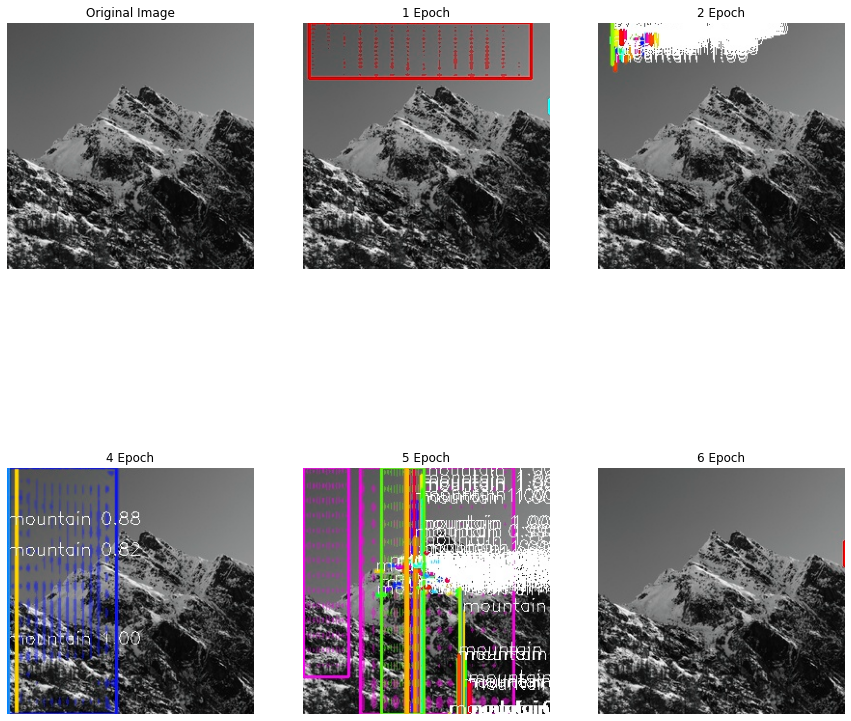

In [26]:
# displays all images after being run through each of the models (hardcoded to 2 rows by 3 cols for 6 images)
# code sourced from: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/ 

def PlottingImagesTogether(list_of_image_paths, list_of_image_titles):
    # create figure
    fig = plt.figure(figsize=(15, 15))
  
    # setting values to rows and column variables
    rows = 2
    columns = 3
  
    # reading images
    Image0 = cv2.imread(list_of_image_paths[0])
    Image1 = cv2.imread(list_of_image_paths[1])
    Image2 = cv2.imread(list_of_image_paths[2])
    Image3 = cv2.imread(list_of_image_paths[3])
    Image4 = cv2.imread(list_of_image_paths[4])
    Image5 = cv2.imread(list_of_image_paths[5])

    # Adds a subplot at the 0st position
    fig.add_subplot(rows, columns, 1)
  
    # showing image
    plt.imshow(Image0)
    plt.axis('off')
    plt.title(list_of_image_titles[0])

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 2)
  
    # showing image
    plt.imshow(Image1)
    plt.axis('off')
    plt.title(list_of_image_titles[1])
  
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 3)
  
    # showing image
    plt.imshow(Image2)
    plt.axis('off')
    plt.title(list_of_image_titles[2])
  
    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 4)
  
    # showing image
    plt.imshow(Image3)
    plt.axis('off')
    plt.title(list_of_image_titles[3])
  
    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 5)
  
    # showing image
    plt.imshow(Image4)
    plt.axis('off')
    plt.title(list_of_image_titles[4])

    # Adds a subplot at the 5th position
    fig.add_subplot(rows, columns, 6)
  
    # showing image
    plt.imshow(Image5)
    plt.axis('off')
    plt.title(list_of_image_titles[5])

image_paths_1 = [ 'Sub_Mountain_USEME/test/gsun_010aa8524191332add1881e4eec9ccac.jpg',
               "BoundedTestImages/sample_out_mount1.jpg", 
               "BoundedTestImages/sample_out_mount2.jpg", 
               "BoundedTestImages/sample_out_mount4.jpg", 
               "BoundedTestImages/sample_out_mount5.jpg", 
               "BoundedTestImages/sample_out_mount6.jpg"]

list_image_titles = ["Original Image", 
                     "1 Epoch", 
                     "2 Epoch",
                     "4 Epoch",
                     "5 Epoch", 
                     "6 Epoch"]
# displaying images for test image 1
PlottingImagesTogether(image_paths_1, list_image_titles)


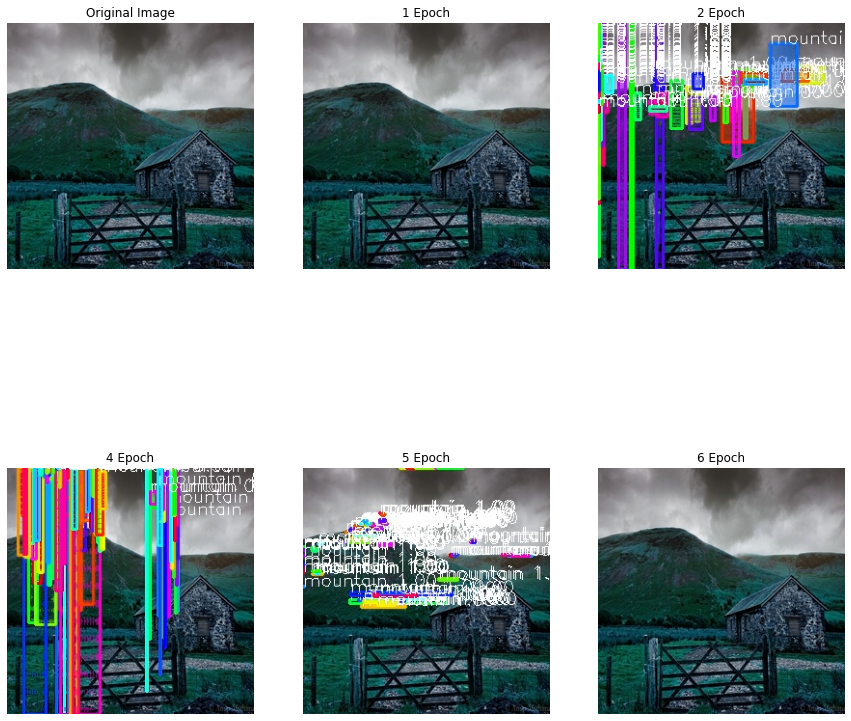

In [27]:
# displaying images for test image 2
image_paths_2 = [ 'Sub_Mountain_USEME/test/gsun_010ebebfffeea5ede0ac50f643ba0441.jpg',
               "BoundedTestImages/sample_out_mount1a.jpg", 
               "BoundedTestImages/sample_out_mount2a.jpg", 
               "BoundedTestImages/sample_out_mount4a.jpg", 
               "BoundedTestImages/sample_out_mount5a.jpg", 
               "BoundedTestImages/sample_out_mount6a.jpg"]
PlottingImagesTogether(image_paths_2, list_image_titles)

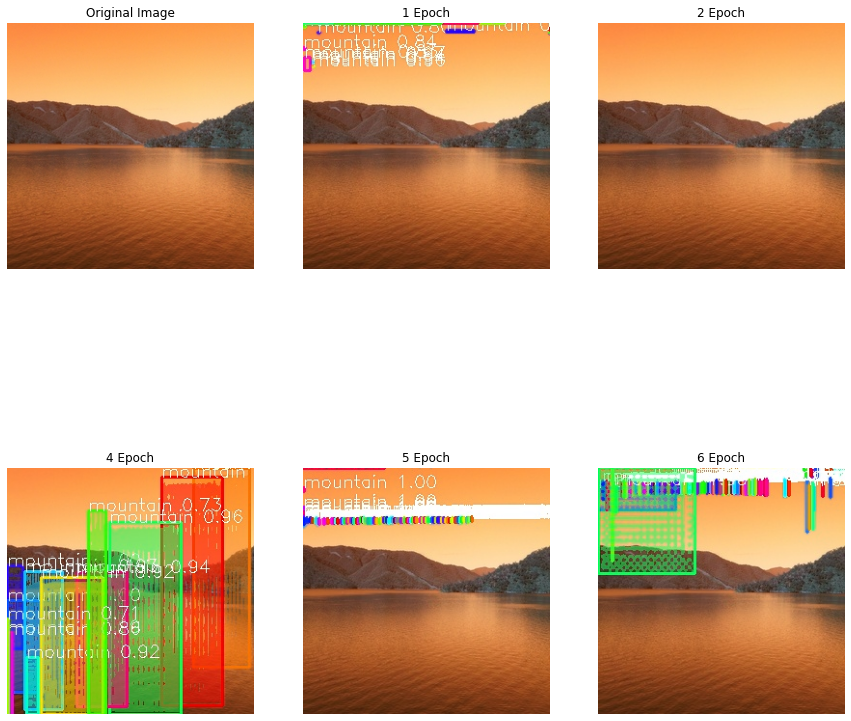

In [28]:
# displaying images for test image 3
image_paths_3 = [ 'Sub_Mountain_USEME/test/gsun_011a6954277ae36946c62d8bdf834ab8.jpg',
               "BoundedTestImages/sample_out_mount1b.jpg", 
               "BoundedTestImages/sample_out_mount2b.jpg", 
               "BoundedTestImages/sample_out_mount4b.jpg", 
               "BoundedTestImages/sample_out_mount5b.jpg", 
               "BoundedTestImages/sample_out_mount6b.jpg"]
PlottingImagesTogether(image_paths_3, list_image_titles)

Let's look at a different test image (gsun_010ebebfffeea5ede0ac50f643ba0441.jpg)

### How can I reduce runtime?

Try training with Significantly less Images? "Sub_Mountain_small" consists of 12 training images and 6 test images. Based on trying to train with fewer images, I do not believe this is a viable way to speed up the training process (it still takes at least 3 hours to train 1 epoch based on this preliminary test). 

Best idea would be getting the code to run on MSI (which I have just successfully done today), but it's worth considering if I can train on a GPU environment within MSI (since I have consistently received warning messages telling me that tensorflow package "This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA" which based on [StackExchange](https://stackoverflow.com/questions/65298241/what-does-this-tensorflow-message-mean-any-side-effect-was-the-installation-su/65333065), is a warning to remind me that is has ability to run (faster?) on different hardware environments). 


In [54]:
import zipfile
with zipfile.ZipFile("Sub_Mountain_small.zip", 'r') as zip_ref:
    zip_ref.extractall()

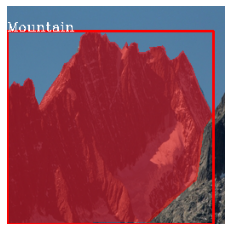

In [4]:
vis_img = instance_custom_training()
vis_img.load_dataset("Sub_Mountain_small")
vis_img.visualize_sample()

In [ ]:
#need to import a new dataset to train off of..but needs to be smaller than the current dataset. 
#only rerun if trying to train model again...

### Train a custom model using your dataset
train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet50", num_classes= 1, batch_size = 6)
train_maskrcnn.load_pretrained_model("Models/mask_rcnn_coco.h5")
train_maskrcnn.load_dataset("Sub_Mountain_small")
print('starting model training for mountain object')
start = time.process_time()
train_maskrcnn.train_model(num_epochs = 10, augmentation=True,  path_trained_models = "mask_rcnn_models_resnet50_small")
print(time.process_time() - start)
      
print("DONE!")

#the question is will this run faster?--Not that I can tell

Using resnet50 as network backbone For Mask R-CNN model
starting model training for mountain object
Applying Default Augmentation on Dataset
Train 12 images
Validate 6 images
Checkpoint Path: C:\Users\runac\Downloads\Fall_2021\Advanced Geocomp\MountainProject\mask_rcnn_models_resnet50_small
Selecting layers to train
Epoch 1/10
 70/100 [====================>.........] - ETA: 1:02:57 - batch: 34.5000 - size: 6.0000 - loss: 2.4103 - rpn_class_loss: 0.2757 - rpn_bbox_loss: 0.7751 - mrcnn_class_loss: 0.0614 - mrcnn_bbox_loss: 0.6537 - mrcnn_mask_loss: 0.6444